# Convert VOC XML Annotations to COCO JSON
Use this notebook to try out importing, analyzing, and exporting datasets of image annotations. 

In [1]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)
!pip install pylabel > /dev/null

In [2]:
from pylabel import importer

## Import VOC annotations 
First we will import annotations from the BCCD dataset, a small public dataset with images of blood cells (https://github.com/Shenggan/BCCD_Dataset).

In [3]:
#Download the annotations and images 
!git clone https://github.com/Shenggan/BCCD_Dataset 
path_to_annotations = "BCCD_Dataset/BCCD/Annotations/"

#Identify the path to get from the annotations to the images 
path_to_images = "../JPEGImages/"

dataset = importer.ImportVOC(path=path_to_annotations, path_to_images=path_to_images, name="BCCD_Dataset")
dataset.df.head(5)

Cloning into 'BCCD_Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800
Receiving objects: 100% (800/800), 7.39 MiB | 25.55 MiB/s, done.
Resolving deltas: 100% (378/378), done.


,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_area,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split
id,,,,,,,,,,,,,,,,,,,,,
0,../JPEGImages/,BloodImage_00315.jpg,NaN,0,640,480,3,0,164.0,261.0,...,13699.0,NaN,NaN,Unspecified,0,0,0,RBC,NaN,
1,../JPEGImages/,BloodImage_00315.jpg,NaN,0,640,480,3,0,15.0,66.0,...,13699.0,NaN,NaN,Unspecified,0,0,0,RBC,NaN,
2,../JPEGImages/,BloodImage_00315.jpg,NaN,0,640,480,3,0,13.0,234.0,...,11781.0,NaN,NaN,Unspecified,0,0,0,RBC,NaN,
3,../JPEGImages/,BloodImage_00315.jpg,NaN,0,640,480,3,0,239.0,3.0,...,11960.0,NaN,NaN,Unspecified,0,0,0,RBC,NaN,
4,../JPEGImages/,BloodImage_00315.jpg,NaN,0,640,480,3,0,542.0,109.0,...,10290.0,NaN,NaN,Unspecified,1,0,0,RBC,NaN,


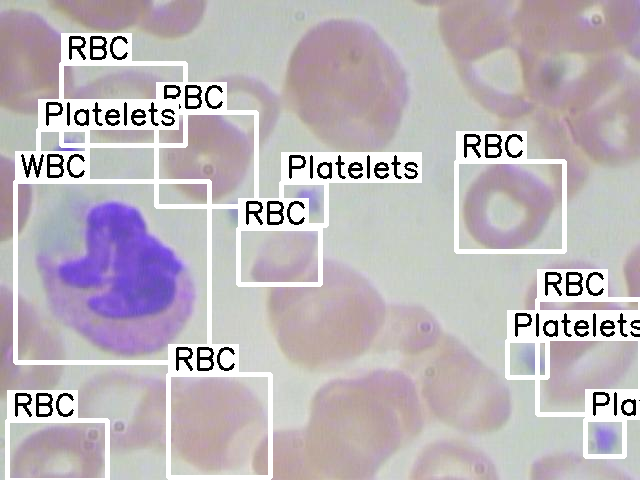

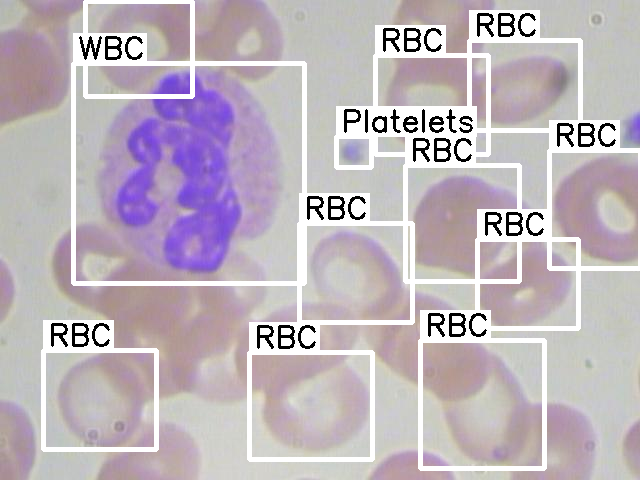

In [4]:
#Confirm that there are images by displaying an image
from IPython.display import display
display(dataset.visualize.ShowBoundingBoxes(67))
display(dataset.visualize.ShowBoundingBoxes("BloodImage_00199.jpg"))

## Analyze annotations
Pylabel can calculate basic summary statisticts about the dataset such as the number of files and the classes. 
The dataset is stored as a pandas frame so the developer can do additional exploratory analysis on the dataset. 

In [5]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")

Number of images: 364
Number of classes: 3
Classes:['RBC', 'WBC', 'Platelets']
Class counts:
RBC          4155
WBC           372
Platelets     361
Name: cat_name, dtype: int64


# Export to COCO JSON
The PyLabel exporter will export all of the annotations in the dataframe to the desired target format.
All annotations will be stored in a single json file. 

In [6]:
dataset.export.ExportToCoco()

['BCCD_Dataset/BCCD/Annotations/BCCD_Dataset.json']